In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
!pip install plotly

In [2]:
DATA = pd.read_csv("2020-2022vs2019_Reopened_Seated_Diner_Data.csv")
DATA.drop("Type", axis=1, inplace=True)
DATA = DATA.set_index('Name')
DATA.head()

,2020/4/1,2020/4/2,2020/4/3,2020/4/4,2020/4/5,2020/4/6,2020/4/7,2020/4/8,2020/4/9,2020/4/10,...,2022/8/5,2022/8/6,2022/8/7,2022/8/8,2022/8/9,2022/8/10,2022/8/11,2022/8/12,2022/8/13,2022/8/14
Name,,,,,,,,,,,,,,,,,,,,,
Global,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.54%,100%,100%,100%,99.69%,97.33%,96.7%,98.28%,100%,100%
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.51%,100%,100%,100%,100%,98.97%,98.17%,99.56%,100%,100%
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100%,100%,100%,100%,100%,100%,98.6%,100%,94.61%,100%
Mexico,9.87%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.17%,96.71%,98.4%,100%,97.66%,91.09%,89.67%,90.9%,91.88%,95.53%
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100%,100%,100%,100%,100%,100%,99.72%,100%,98.31%,98.19%


In [4]:
# df.set_index(['Name','Company_Name'], inplace=True)
DATA = DATA.stack().reset_index()
DATA.columns = ['Name', 'date', 'value']
DATA.head()

,Name,date,value
0,Global,2020/5/14,36.56%
1,Global,2020/5/15,39.52%
2,Global,2020/5/16,33.32%
3,Global,2020/5/17,35.05%
4,Global,2020/5/18,34.65%


In [5]:
DATA.date = pd.to_datetime(DATA.date)
DATA.head()

,Name,date,value
0,Global,2020-05-14,36.56%
1,Global,2020-05-15,39.52%
2,Global,2020-05-16,33.32%
3,Global,2020-05-17,35.05%
4,Global,2020-05-18,34.65%


In [6]:
# DATA['value']=DATA['value'].astype(float)
DATA['value'] = DATA['value'].str.replace(r'\D', '')
DATA

,Name,date,value
0,Global,2020-05-14,3656
1,Global,2020-05-15,3952
2,Global,2020-05-16,3332
3,Global,2020-05-17,3505
4,Global,2020-05-18,3465
...,...,...,...
13175,New York,2022-08-10,8331
13176,New York,2022-08-11,7969
13177,New York,2022-08-12,8549
13178,New York,2022-08-13,9646


In [7]:
DATA['value']=DATA['value'].astype(float)

In [8]:
df1 = DATA[['Name', 'date','value']]
df1 = pd.pivot_table(df1, values='value', 
                     index=['date'], 
                     columns='Name')

<AxesSubplot:xlabel='date'>

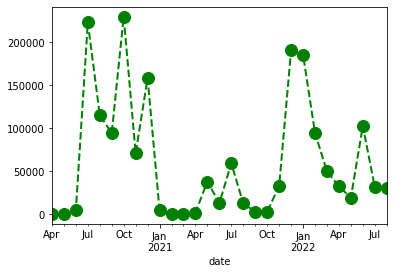

In [9]:
df1['United Kingdom'].resample('M').sum().plot(color='green', marker='o', 
                                            linestyle='dashed',linewidth=2, markersize=12)

<AxesSubplot:xlabel='date'>

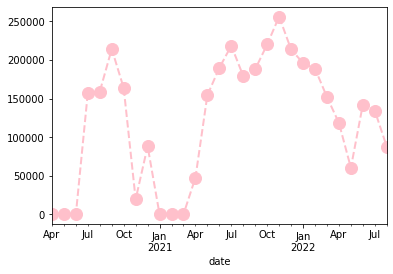

In [11]:
df1['London'].resample('M').sum().plot(color='Pink', marker='o', 
                                            linestyle='dashed',linewidth=2, markersize=12)